In [1]:
import pandas as pd
from pathlib import Path


base_path = Path("../")
data_dir_path = base_path.joinpath("data/NCEI-Oakland_International_airport-standard_units")
data_file_path = data_dir_path.joinpath("weather.csv")



weather_file = pd.read_csv(data_file_path, index_col="DATE")

In [2]:
weather_file.apply(pd.isnull).sum()/weather_file.shape[0]

STATION    0.000000
NAME       0.000000
AWND       0.001034
FMTM       0.748363
PGTM       0.512122
PRCP       0.001724
SNOW       0.675399
SNWD       0.661036
TAVG       0.765943
TMAX       0.001264
TMIN       0.001609
TSUN       0.867747
WDF2       0.000919
WDF5       0.011031
WSF2       0.000804
WSF5       0.011031
WT01       0.717798
WT02       0.980467
WT03       0.992302
WT05       0.999540
WT08       0.858095
WT09       0.999885
dtype: float64

In [3]:
core_weather_data = weather_file[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather_data.columns = ["PRECIPITATION", "SNOW", "SNOW_DEPTH", "TMAX", "TMIN"]
core_weather_data.apply(pd.isnull).sum()


PRECIPITATION      15
SNOW             5878
SNOW_DEPTH       5753
TMAX               11
TMIN               14
dtype: int64

In [4]:
# Because in Oakland there is no much snow,
# also most of data are blank
# I will delete SNOW and SNOW_DEPTH columns

core_weather_data.drop(columns=["SNOW","SNOW_DEPTH"], inplace=True)
core_weather_data

,PRECIPITATION,TMAX,TMIN
DATE,,,
2000-01-01,0.0,12.2,5.0
2000-01-02,0.0,12.2,1.1
2000-01-03,0.0,12.8,0.6
2000-01-04,0.3,12.2,1.7
2000-01-05,0.0,15.0,2.2
...,...,...,...
2023-10-27,0.0,16.7,6.1
2023-10-28,0.0,20.6,6.1
2023-10-29,0.0,23.9,6.7


In [5]:
# Check the precip blank values
core_weather_data[pd.isnull(core_weather_data["PRECIPITATION"])]

,PRECIPITATION,TMAX,TMIN
DATE,,,
2000-09-07,NaN,30.0,10.6
2000-10-17,NaN,21.1,8.3
2001-03-20,NaN,24.4,12.2
2002-05-24,NaN,26.1,10.0
2002-10-28,NaN,21.7,5.6
2004-01-07,NaN,15.0,8.3
2004-11-20,NaN,NaN,NaN
2006-07-03,NaN,18.3,12.2
2009-12-14,NaN,13.3,7.8


In [6]:
# Replace most of the NaN values with 0 because there is not much raining
core_weather_data["PRECIPITATION"] = core_weather_data["PRECIPITATION"].fillna(0)

In [7]:
# Check temperature blank values
core_weather_data[pd.isnull(core_weather_data["TMAX"])]
core_weather_data[pd.isnull(core_weather_data["TMIN"])]

,PRECIPITATION,TMAX,TMIN
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,16.1,NaN
2011-12-22,0.0,16.7,NaN
2011-12-23,0.0,13.3,NaN
2011-12-24,0.0,12.8,NaN
2011-12-25,0.0,12.2,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [8]:
# Use forwart fill method to remove blank cells
core_weather_data["TMAX"] = core_weather_data["TMAX"].ffill()
core_weather_data["TMIN"] = core_weather_data["TMIN"].ffill()

In [9]:
# Check types of data
core_weather_data.dtypes

PRECIPITATION    float64
TMAX             float64
TMIN             float64
dtype: object

In [10]:
# Convert index to datetime
core_weather_data.index = pd.to_datetime(core_weather_data.index)
core_weather_data.index
core_weather_data.index.year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=8703)

<Axes: xlabel='DATE'>

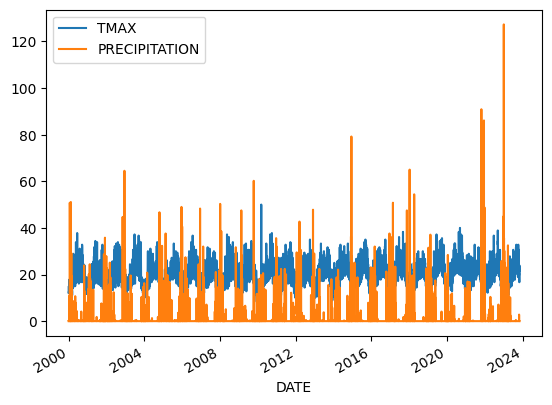

In [11]:
# Plot some graphs
core_weather_data[["TMAX", "PRECIPITATION"]].plot()

In [12]:
# prepare the targets columns
core_weather_data["TARGET_TMAX"]             = core_weather_data.shift(-1)["TMAX"]
core_weather_data["TARGET_TMIN"]             = core_weather_data.shift(-1)["TMIN"]
core_weather_data["TARGET_PRECIPITATION"]    = core_weather_data.shift(-1)["PRECIPITATION"]

In [13]:
prepared_data = data_dir_path.joinpath("prepared_weather.csv")
core_weather_data.to_csv(prepared_data)